# **Desafio Técnico - Modelagem**

Americanas - Cientista de Dados Júnior | BEE

Candidato: Rafael Pavan

Linkedin: https://www.linkedin.com/in/engrafaelpavan/

## 1. Modelos, Métricas, Critérios de Avaliação:

- Para analisar o desempenho médio dos algoritmos no treino e validação, será utilizado validação-cruzada com cv=3;

- Para escolher os hiperparâmetros do modelo, será utilizado a técnica RandomSearchCV;

- Métricas: Acurácia, AUC, Precisão Macro, Revocação Macro e F1 Macro.


In [509]:
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.ensemble import RandomForestClassifier #RandomForest
from sklearn.linear_model import LogisticRegression #LogisticRegression
from xgboost import XGBClassifier #XGBOOST
from sklearn.svm import SVC #Support Vector Machines
from sklearn.model_selection import RandomizedSearchCV
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle 

raiz = os.getcwd()


X_train = pd.read_csv(f'{raiz}/dados_processados/X_train_processado.csv').values

y_train = pd.read_csv(f'{raiz}/dados_processados/y_train_processado.csv').values.ravel()

X_test = pd.read_csv(f'{raiz}/dados_processados/X_test_processado.csv').values

y_test = pd.read_csv(f'{raiz}/dados_processados/y_test_processado.csv').values.ravel()

seed = 13

## K-Nearest-Neighbors

In [4]:
knn = KNeighborsClassifier()

param_grid_knn = {'n_neighbors':[3,5,7,9,11,13], 'weights':['uniform', 'distance'], 'metric':['euclidean', 'manhattan', 'minkowski']} 

knn_search = RandomizedSearchCV(knn, # método
                            param_grid_knn, # grid de parâmetros
                            cv=3, # crossvalidation
                            random_state=seed,
                            n_iter=30,
                            scoring = 'accuracy')


knn_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=30,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [3, 5, 7, 9, 11, 13],
                                        'weights': ['uniform', 'distance']},
                   random_state=13, scoring='accuracy')

In [5]:
print(f'KNN Best Model: {knn_search.best_params_} com acurácia {100*knn_search.best_score_}')


KNN Best Model: {'weights': 'uniform', 'n_neighbors': 3, 'metric': 'minkowski'} com acurácia 61.868686868686865


              precision    recall  f1-score   support

           0       0.65      0.59      0.62        37
           1       0.58      0.64      0.61        33

    accuracy                           0.61        70
   macro avg       0.62      0.62      0.61        70
weighted avg       0.62      0.61      0.61        70



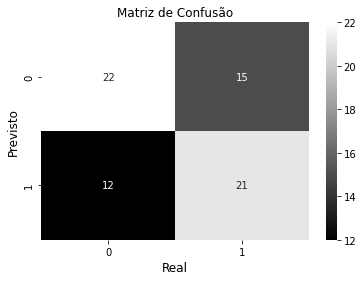

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

def confusion_matrix_plot(yteste, ypredi):
    
    sns.heatmap(confusion_matrix(yteste,ypredi), annot=True, cmap='gray')
    plt.xlabel('Real', fontsize=12)
    plt.ylabel('Previsto', fontsize=12)
    plt.title('Matriz de Confusão')
    plt.show()

with open('knn.pkl', 'wb') as pickle_file:
    
    pickle.dump(knn_search.best_estimator_, pickle_file)
    
y_pred_knn = knn_search.best_estimator_.predict(X_test)

print(classification_report(y_test,y_pred_knn))

confusion_matrix_plot(y_test, y_pred_knn)

## Logistic Regression

In [7]:
lr = LogisticRegression()

param_grid_lr = {'penalty':['l1', 'l2', 'elasticnet'],
                 'C':[0.001,0.01,0.1,1,10,100,1000],
                 'solver':['newton-cg', 'lbfgs', 'liblinear', 'saga'],
                 'max_iter':[10000]
                }
                 
                  
                  
                  
lr_search = RandomizedSearchCV(lr, # método
                            param_grid_lr, # grid de parâmetros
                            cv=3, # crossvalidation
                            random_state=seed,
                            n_iter=60,
                            scoring = 'accuracy')


lr_search.fit(X_train, y_train)


##################################################################################
# Alguns solvers não suportam certos tipos de regularização, então serão mostrados alguns erros
##################################################################################

/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError: Solver n

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=60,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'max_iter': [10000],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'saga']},
                   random_state=13, scoring='accuracy')

In [8]:
print(f'LogisticRegression Best Model: {lr_search.best_params_} com acurácia {100*lr_search.best_score_}')


LogisticRegression Best Model: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 10000, 'C': 1} com acurácia 63.38383838383837


              precision    recall  f1-score   support

           0       0.82      0.38      0.52        37
           1       0.57      0.91      0.70        33

    accuracy                           0.63        70
   macro avg       0.69      0.64      0.61        70
weighted avg       0.70      0.63      0.60        70



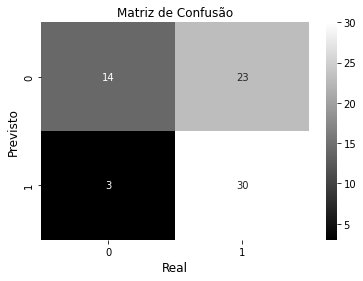

In [9]:
with open('lr.pkl', 'wb') as pickle_file:
    
    pickle.dump(lr_search.best_estimator_, pickle_file)
    
y_pred_lr = lr_search.best_estimator_.predict(X_test)

print(classification_report(y_test,y_pred_lr))

confusion_matrix_plot(y_test, y_pred_lr)

## Support Vector Machines

In [15]:
svm = SVC()

param_grid_svm = {'kernel':['linear', 'poly', 'rbf'],
                 'C':[0.001,0.01,0.1,1,10,100,1000],
                 'degree':[2, 3, 4, 5, 6, 7],
                 'gamma':['scale', 'auto']
                }
                 
                  
                  
                  
svm_search = RandomizedSearchCV(svm, # método
                            param_grid_svm, # grid de parâmetros
                            cv=3, # crossvalidation
                            random_state=seed,
                            n_iter=200,
                            scoring = 'accuracy')


svm_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=200,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'degree': [2, 3, 4, 5, 6, 7],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   random_state=13, scoring='accuracy')

In [16]:
print(f'Support Vector Machine Best Model: {svm_search.best_params_} com acurácia {100*svm_search.best_score_}')


Support Vector Machine Best Model: {'kernel': 'poly', 'gamma': 'auto', 'degree': 5, 'C': 1000} com acurácia 65.65656565656566


              precision    recall  f1-score   support

           0       0.79      0.30      0.43        37
           1       0.54      0.91      0.67        33

    accuracy                           0.59        70
   macro avg       0.66      0.60      0.55        70
weighted avg       0.67      0.59      0.55        70



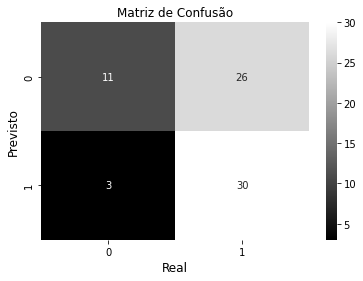

In [17]:
with open('svm.pkl', 'wb') as pickle_file:
    
    pickle.dump(svm_search.best_estimator_, pickle_file)
    
y_pred_svm = svm_search.best_estimator_.predict(X_test)

print(classification_report(y_test,y_pred_svm))

confusion_matrix_plot(y_test, y_pred_svm)

### Random Forest Classifier

In [22]:
rf = RandomForestClassifier()

param_grid_rf =     {
                    'n_estimators': [50, 100, 200, 300, 500],
                    'max_features': ['sqrt', 'log2'],
                    'max_depth' : [3,4,5,6,7,8],
                    'criterion' :['gini', 'entropy'],
                    'min_samples_split':[2,3,4,5,6],
                    'min_samples_leaf':[2,3,4,5,6,7],
                    
                    }


                 
                  
                  
                  
rf_search = RandomizedSearchCV(rf, # método
                            param_grid_rf, # grid de parâmetros
                            cv=3, # crossvalidation
                            random_state=seed,
                            n_iter=500,
                            scoring = 'accuracy')


rf_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=500,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [50, 100, 200, 300, 500,
                                                         1000]},
                   random_state=13, scoring='accuracy')

In [23]:
print(f'Random Forest Best Model: {rf_search.best_params_} com acurácia {100*rf_search.best_score_}')


Random Forest Best Model: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'gini'} com acurácia 65.4040404040404


              precision    recall  f1-score   support

           0       0.93      0.38      0.54        37
           1       0.58      0.97      0.73        33

    accuracy                           0.66        70
   macro avg       0.76      0.67      0.63        70
weighted avg       0.77      0.66      0.63        70



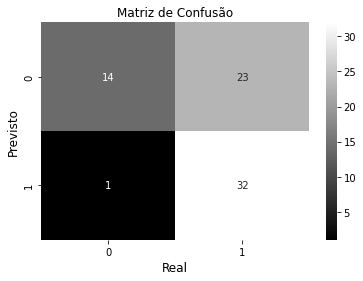

In [24]:
with open('rf.pkl', 'wb') as pickle_file:
    
    pickle.dump(rf_search.best_estimator_, pickle_file)
    
y_pred_rf = rf_search.best_estimator_.predict(X_test)

print(classification_report(y_test,y_pred_rf))

confusion_matrix_plot(y_test, y_pred_rf)

### XGBoost Classifier

In [26]:
xgb = XGBClassifier()

param_grid_xgb =   {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'learning_rate':[0.01,0.05,0.1,0.5,0.005,0.001]
        }
                 

                  
xgb_search = RandomizedSearchCV(xgb, # método
                            param_grid_xgb, # grid de parâmetros
                            cv=3, # crossvalidation
                            random_state=seed,
                            n_iter=500,
                            scoring = 'accuracy')


xgb_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=500,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          0.005, 0.001],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=13, scoring='accuracy')

In [27]:
print(f'XGBoost Classifier Best Model: {xgb_search.best_params_} com acurácia {100*xgb_search.best_score_}')


XGBoost Classifier Best Model: {'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.5, 'colsample_bytree': 0.8} com acurácia 66.4141414141414


              precision    recall  f1-score   support

           0       0.70      0.38      0.49        37
           1       0.54      0.82      0.65        33

    accuracy                           0.59        70
   macro avg       0.62      0.60      0.57        70
weighted avg       0.62      0.59      0.57        70



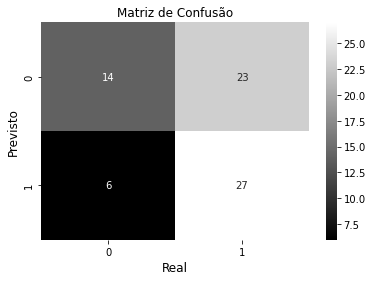

In [28]:
with open('xgb.pkl', 'wb') as pickle_file:
    
    pickle.dump(xgb_search.best_estimator_, pickle_file)
    
y_pred_xgb = xgb_search.best_estimator_.predict(X_test)

print(classification_report(y_test,y_pred_xgb))

confusion_matrix_plot(y_test, y_pred_xgb)

### Dummy Classifier

In [30]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='uniform')

dummy.fit(X_train, y_train)

DummyClassifier(strategy='uniform')

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


acuracias = []

for i in range(100):
    
    y_pred_dummy = dummy.predict(X_test)

    acuracias.append(accuracy_score(y_test, y_pred_dummy))

print("Média do desempenho do classificador dummy:", 100*np.mean(acuracias))


Média do desempenho do classificador dummy: 50.499999999999986


### 2. Resultados

Nesta seção, serão mostrados os resultados obtidos pelos algoritmos.

In [473]:
modelos = ['knn', 'logisticregression', 'supportvectormachines', 'randomforest', 'xgboost', 'dummy']

acuracia = [accuracy_score(y_test, y_pred_knn),accuracy_score(y_test, y_pred_lr),accuracy_score(y_test, y_pred_svm),accuracy_score(y_test, y_pred_rf),accuracy_score(y_test, y_pred_xgb),accuracy_score(y_test, y_pred_dummy)]

precisao = [precision_score(y_test, y_pred_knn, average='macro'),precision_score(y_test, y_pred_lr,average='macro'),precision_score(y_test, y_pred_svm,average='macro'),precision_score(y_test, y_pred_rf,average='macro'),precision_score(y_test, y_pred_xgb,average='macro'),precision_score(y_test, y_pred_dummy,average='macro')]

recall = [recall_score(y_test, y_pred_knn, average='macro'),recall_score(y_test, y_pred_lr, average='macro'),recall_score(y_test, y_pred_svm, average='macro'),recall_score(y_test, y_pred_rf, average='macro'),recall_score(y_test, y_pred_xgb, average='macro'),recall_score(y_test, y_pred_dummy, average='macro')]

f1 = [f1_score(y_test, y_pred_knn, average='macro'),f1_score(y_test, y_pred_lr, average='macro'),f1_score(y_test, y_pred_svm, average='macro'),f1_score(y_test, y_pred_rf, average='macro'),f1_score(y_test, y_pred_xgb, average='macro'),f1_score(y_test, y_pred_dummy, average='macro')]

auc = [roc_auc_score(y_test, y_pred_knn, average='macro'),roc_auc_score(y_test, y_pred_lr, average='macro'),roc_auc_score(y_test, y_pred_svm, average='macro'),roc_auc_score(y_test, y_pred_rf, average='macro'),roc_auc_score(y_test, y_pred_xgb, average='macro'),roc_auc_score(y_test, y_pred_dummy, average='macro')]

In [474]:
relatorio = pd.DataFrame(
                            {
                                
                            'modelos': modelos,
                            'acuracia': acuracia,
                            'precisao_macro': precisao,
                            'recall_macro': recall,
                            'f1_macro': f1,
                            'auc': auc
                            
                            }
                        )


relatorio.to_csv('modelos_metricas.csv', index=False)

relatorio

,modelos,acuracia,precisao_macro,recall_macro,f1_macro,auc
0,knn,0.614286,0.615196,0.615479,0.614207,0.615479
1,logisticregression,0.628571,0.694784,0.643735,0.608096,0.643735
2,supportvectormachines,0.585714,0.660714,0.603194,0.552765,0.603194
3,randomforest,0.657143,0.757576,0.674038,0.632867,0.674038
4,xgboost,0.585714,0.620000,0.598280,0.570915,0.598280
5,dummy,0.457143,0.453267,0.453726,0.453125,0.453726


Text(0.5, 1.0, 'Feature Importance - Random Forest')

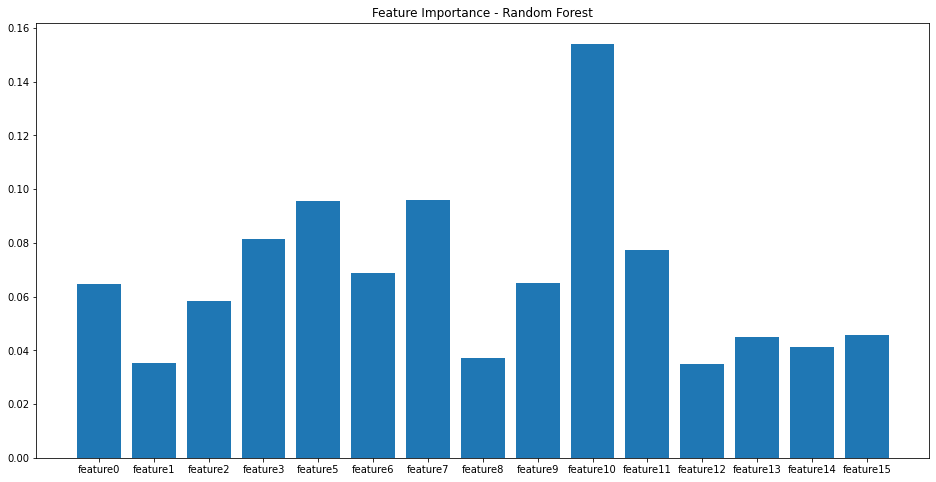

In [507]:
plt.figure(figsize=(16,8))
plt.bar(pd.read_csv(f'{raiz}/dados_processados/X_train_processado.csv').columns, rf_search.best_estimator_.feature_importances_)
plt.title('Feature Importance - Random Forest')

_____

- **Como não conhecemos o problema de negócio que estamos aplicando a análise de dados e a inteligência artificial, acabamos não tendo uma baseline/benchmark para analisar a performance dos modelos desenvolvidos**
____
- **Para efeitos de comparação, foi criado um classificador dummy que chuta valores binários aleatóriamente com probabilidade uniforme. É possível observar que esse classificador apresentou todas as métricas abaixo de 50%**

____

- **O melhor modelo desenvolvido, ou seja, aquele que alcançou a melhor performance geral nas métricas, foi o Random Forest. Obteve acurácia 65%, precisão macro de 75%, revocação macro de 67%, f1 macro de 63% e AUC de 67%.**

___

- **Segundo o Random Forest, a feature mais importante para o problema é a 'feature10', seguida de: 'feature7', 'feature5' e 'feature0'.**

___

- **Como visto na etapa de análise de dados, as distribuições das features de cada classe da variável target são muito similares, de forma a dificultar encontrar padrões que aumentem a separação das classes e ajudem o modelo a classificá-las de forma eficiente.**

____

- **Para aprimorar a análise, preparação e modelagem, eu procuraria entender mais a respeito do negócio e a coletar mais dados. Com maiores informações sobre o que as features significam, poderíamos tomar decisões melhores sobre o feature engineering a ser aplicado. Neste trabalho assumi que as features inteiras eram quantitavias e não qualitativas, assim como assumi que os outliers não eram erros de digitação ou medição, e sim anomalias naturais de suas respectivas populações.**

___

- **Com mais tempo para realizar a análise, poderia tentar outras técnicas como: criação de novas features com base nas já existentes no conjunto de dados, utilizar one-hot-encoding/label-encoding para eventuais variáveis categóricas, testar outros valores para amplitude interquartil, testar outras técnicas para lidar com os outliers como a imputation, etc. Além disso poderia ser testada a retirada de outras features do conjunto de dados.**

___

